# Lib test


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from IPython import display

from nn.network import Network
from nn.layer import Linear
import nn.activation as activations

In [3]:
def decision_boundary(fn) -> tuple[list, list, list]:
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = fn([X[i, j], Y[i, j]])

    return X, Y, Z


def generate_linear(n: int, shift: int = 0.3) -> tuple[npt.ArrayLike, npt.ArrayLike]:
    X = np.random.uniform(-1, 1, (100, 2))
    y = np.zeros(100)
    y[X[:, 0] + X[:, 1] + shift > 0] = 1
    return X, y


def generate_circle(n: int, r: float = 0.8) -> tuple[npt.ArrayLike, npt.ArrayLike]:
    X = np.random.uniform(-1, 1, (100, 2))
    y = np.zeros(100)
    y[X[:, 0] ** 2 + X[:, 1] ** 2 < r**2] = 1
    return X, y

In [4]:
np.random.seed(0)

# FIXME: Not learning when using ReLU on all layers
net = Network([Linear(2, 2), Linear(2, 3), Linear(3, 1, activation=activations.Sigmoid())])
# X, y = generate_linear(100, shift=0.3)
X, y = generate_circle(100, r=0.8)

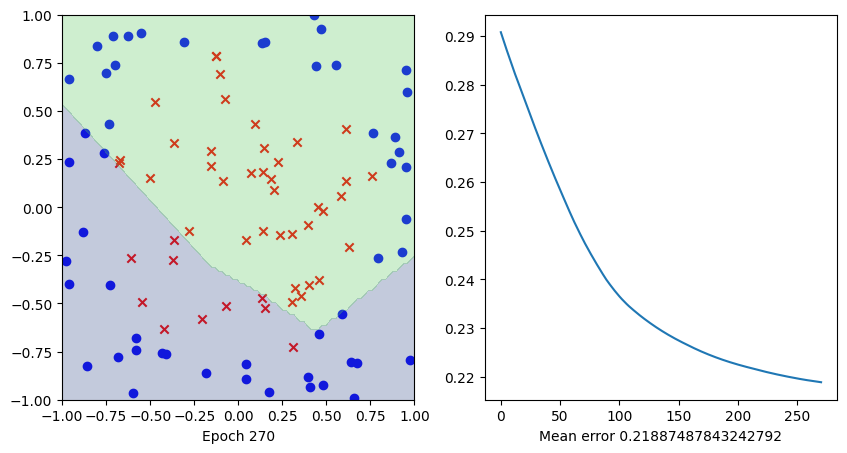

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


errors = []
for i in range(1001):
    err = net.train(X, y)
    errors.append(err)

    if i % 10 != 0:
        continue

    Xd, Yd, Zd = decision_boundary(lambda x: net.forward(x)[0] > 0.5)

    ax1.clear()
    ax1.scatter(X[y == 0, 0], X[y == 0, 1], c="blue", marker="o")
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], c="red", marker="x")
    ax1.contourf(Xd, Yd, Zd, levels=[-1, 0, 1], alpha=0.3)

    ax2.clear()
    ax2.plot(errors)

    ax1.set_xlabel(f"Epoch {i}")
    ax2.set_xlabel(f"Mean error {err}")

    display.clear_output(wait=True)
    display.display(fig)

    if err == 0:
        break

display.clear_output(wait=True)

## To Do
- [ ] k-fold Cross Validation
- [ ] Weight decay
- [ ] Regularization
- [ ] Nesterov